**MAESTRÍA EN INTELIGENCIA ARTIFICIAL APLICADA**

**Curso: TC4029 - Ciencia y analítica de datos**

Tecnológico de Monterrey

Prof Grettel Barceló Alonso

**Semana 6**
Ingeniería de características (FE)

---

*   NOMBRE: Armando Cerda
*   MATRÍCULA: A01570376

*   NOMBRE: Christopher Parga
*   MATRÍCULA: A00818942

*   NOMBRE: Julio Ruiz
*   MATRÍCULA: A01794742

*   NOMBRE: Mayra Cabrera
*   MATRÍCULA: A01795439

In [1]:
!pip install category_encoders



[notice] A new release of pip is available: 23.1.2 -> 23.3
[notice] To update, run: pip install --upgrade pip


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [3]:
cars_df = pd.read_csv('vehicles.csv')
cars_df.head()

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
0,7222695916,https://prescott.craigslist.org/cto/d/prescott...,prescott,https://prescott.craigslist.org,6000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,az,NaN,NaN,NaN
1,7218891961,https://fayar.craigslist.org/ctd/d/bentonville...,fayetteville,https://fayar.craigslist.org,11900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ar,NaN,NaN,NaN
2,7221797935,https://keys.craigslist.org/cto/d/summerland-k...,florida keys,https://keys.craigslist.org,21000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,fl,NaN,NaN,NaN
3,7222270760,https://worcester.craigslist.org/cto/d/west-br...,worcester / central MA,https://worcester.craigslist.org,1500,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ma,NaN,NaN,NaN
4,7210384030,https://greensboro.craigslist.org/cto/d/trinit...,greensboro,https://greensboro.craigslist.org,4900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,nc,NaN,NaN,NaN


In [4]:
cars_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 26 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   url           426880 non-null  object 
 2   region        426880 non-null  object 
 3   region_url    426880 non-null  object 
 4   price         426880 non-null  int64  
 5   year          425675 non-null  float64
 6   manufacturer  409234 non-null  object 
 7   model         421603 non-null  object 
 8   condition     252776 non-null  object 
 9   cylinders     249202 non-null  object 
 10  fuel          423867 non-null  object 
 11  odometer      422480 non-null  float64
 12  title_status  418638 non-null  object 
 13  transmission  424324 non-null  object 
 14  VIN           265838 non-null  object 
 15  drive         296313 non-null  object 
 16  size          120519 non-null  object 
 17  type          334022 non-null  object 
 18  pain

# **Parte 1**. Preprocesamiento

1a)    Elimina las columnas que no serán relevantes para esta actividad: `id`, `VIN`, `url`, `image_url`, `description`, `posting_date`.


In [5]:
cars_df.drop(["id", "VIN", "url", "image_url", "description", "posting_date"], axis=1, inplace=True)

1b) Almacena en una variable la cantidad de observaciones o registros del dataframe y en otra el número de columnas (después del borrado) para análisis posteriores. 

In [6]:
records, columms  = cars_df.shape

print("Number of records:", records)
print("Number of columns:", columms)

Number of records: 426880
Number of columns: 20


## Valores faltantes

Cuando la cantidad de valores faltantes en una columna es lo suficientemente grande (aproximadamente más del 25%), estimar e ingresar los valores faltantes no tiene sentido, y eliminar el atributo es mejor que estimar los valores faltantes. https://learning.oreilly.com/library/view/hands-on-data-preprocessing/9781801072137/B17397_11_Final_NM_ePub.xhtml#_idParaDest-188

Sin embargo, esto no es una regla aplicable a todos los escenarios y hay muchas discusiones en torno a ello. https://discuss.analyticsvidhya.com/t/what-should-be-the-allowed-percentage-of-missing-values/2456/10

Para esta actividad  utilizaremos un umbral de 0.70 de la cantidad de registros (aquellas columnas que tengan 70% de valores no nulos). Considera además que estamos asumiendo que dichas variables son MCAR o MAR sin ninguna método gráfico o estadístico.

2a) Determina el porcentaje de valores faltantes por columna y elimina aquellas que posean el 30% o más de valores perdidos. Para ello utiliza el parámetro `thresh` de la función `dropna()` ¿Cuántas columnas se eliminaron?


In [7]:
porcentaje_valores_faltantes = cars_df.isnull().sum() / len(cars_df)
print(porcentaje_valores_faltantes)

region          0.000000
region_url      0.000000
price           0.000000
year            0.002823
manufacturer    0.041337
model           0.012362
condition       0.407852
cylinders       0.416225
fuel            0.007058
odometer        0.010307
title_status    0.019308
transmission    0.005988
drive           0.305863
size            0.717675
type            0.217527
paint_color     0.305011
county          1.000000
state           0.000000
lat             0.015342
long            0.015342
dtype: float64


In [8]:
threshold = 0.70 * len(cars_df)
df_limpio = cars_df.dropna(axis=1, thresh=threshold)

In [9]:
columnas_eliminadas = columms - df_limpio.shape[1]
columnas_eliminadas

6

Además, cuando tenemos grandes conjuntos de datos, podemos eliminar filas que contienen valores nulos. Aunque, no se recomienda si el porcentaje de valores faltantes en el conjunto de datos es superior al 30% 
https://medium.com/analytics-vidhya/how-to-deal-with-missing-values-in-data-set-8e8f70ecf155

2b) Borra los registros que contengan `NaN` en las columnas con menos del 5% de valores faltantes empleando el parámetro subset ¿Qué porcentaje de los registros iniciales se eliminaron?


In [10]:
porcentaje_valores_faltantes = df_limpio.isnull().sum() / len(cars_df)
print(porcentaje_valores_faltantes)

region          0.000000
region_url      0.000000
price           0.000000
year            0.002823
manufacturer    0.041337
model           0.012362
fuel            0.007058
odometer        0.010307
title_status    0.019308
transmission    0.005988
type            0.217527
state           0.000000
lat             0.015342
long            0.015342
dtype: float64


In [11]:
columnas_menos_del_5porc = porcentaje_valores_faltantes[porcentaje_valores_faltantes < 0.05].index.tolist()
print(columnas_menos_del_5porc)
df_limpio_filas = df_limpio.dropna(subset=columnas_menos_del_5porc)

registros_eliminados = len(df_limpio) - len(df_limpio_filas)
porcentaje_eliminado = (registros_eliminados / len(df_limpio)) * 100

print(f'Se eliminaron el {porcentaje_eliminado:.2f}% de los registros iniciales.')


['region', 'region_url', 'price', 'year', 'manufacturer', 'model', 'fuel', 'odometer', 'title_status', 'transmission', 'state', 'lat', 'long']
Se eliminaron el 10.16% de los registros iniciales.


In [12]:
porcentaje_valores_faltantes = df_limpio_filas.isnull().sum() / len(cars_df)
print(porcentaje_valores_faltantes)

region          0.000000
region_url      0.000000
price           0.000000
year            0.000000
manufacturer    0.000000
model           0.000000
fuel            0.000000
odometer        0.000000
title_status    0.000000
transmission    0.000000
type            0.193017
state           0.000000
lat             0.000000
long            0.000000
dtype: float64


2c) Si hay variables que aún poseen valores faltantes, utiliza el método de imputación apropiado (`mean, median, mode`) 

In [13]:
# numéricas con distribución normal: usar la media
# numéricas con distribución sesgada: usar la mediana
# categóricas: usar la moda

In [14]:
for columna in df_limpio_filas.select_dtypes(include=['float64', 'int64']).columns:
    if df_limpio_filas[columna].isnull().sum() > 0:  
        if df_limpio_filas[columna].std() < 1:  
            print(f"{columna} was imputed by mean")
            df_limpio_filas[columna].fillna(df_limpio_filas[columna].mean(), inplace=True)
        else:
            print(f"{columna} was imputed by median")            
            df_limpio_filas[columna].fillna(df_limpio_filas[columna].median(), inplace=True)

In [15]:
for columna in df_limpio_filas.select_dtypes(include=['object']).columns:
    if df_limpio_filas[columna].isnull().sum() > 0: 
        df_limpio_filas[columna].fillna(df_limpio_filas[columna].mode()[0], inplace=True)

/tmp/ipykernel_6887/1504203985.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_limpio_filas[columna].fillna(df_limpio_filas[columna].mode()[0], inplace=True)


In [16]:
porcentaje_valores_faltantes = df_limpio_filas.isnull().sum() / len(df_limpio_filas)
print(porcentaje_valores_faltantes)

region          0.0
region_url      0.0
price           0.0
year            0.0
manufacturer    0.0
model           0.0
fuel            0.0
odometer        0.0
title_status    0.0
transmission    0.0
type            0.0
state           0.0
lat             0.0
long            0.0
dtype: float64


## Valores atípicos

3a) Obtén el histograma de las variables `price`, `year` y `odometer` para observar su distribución. 

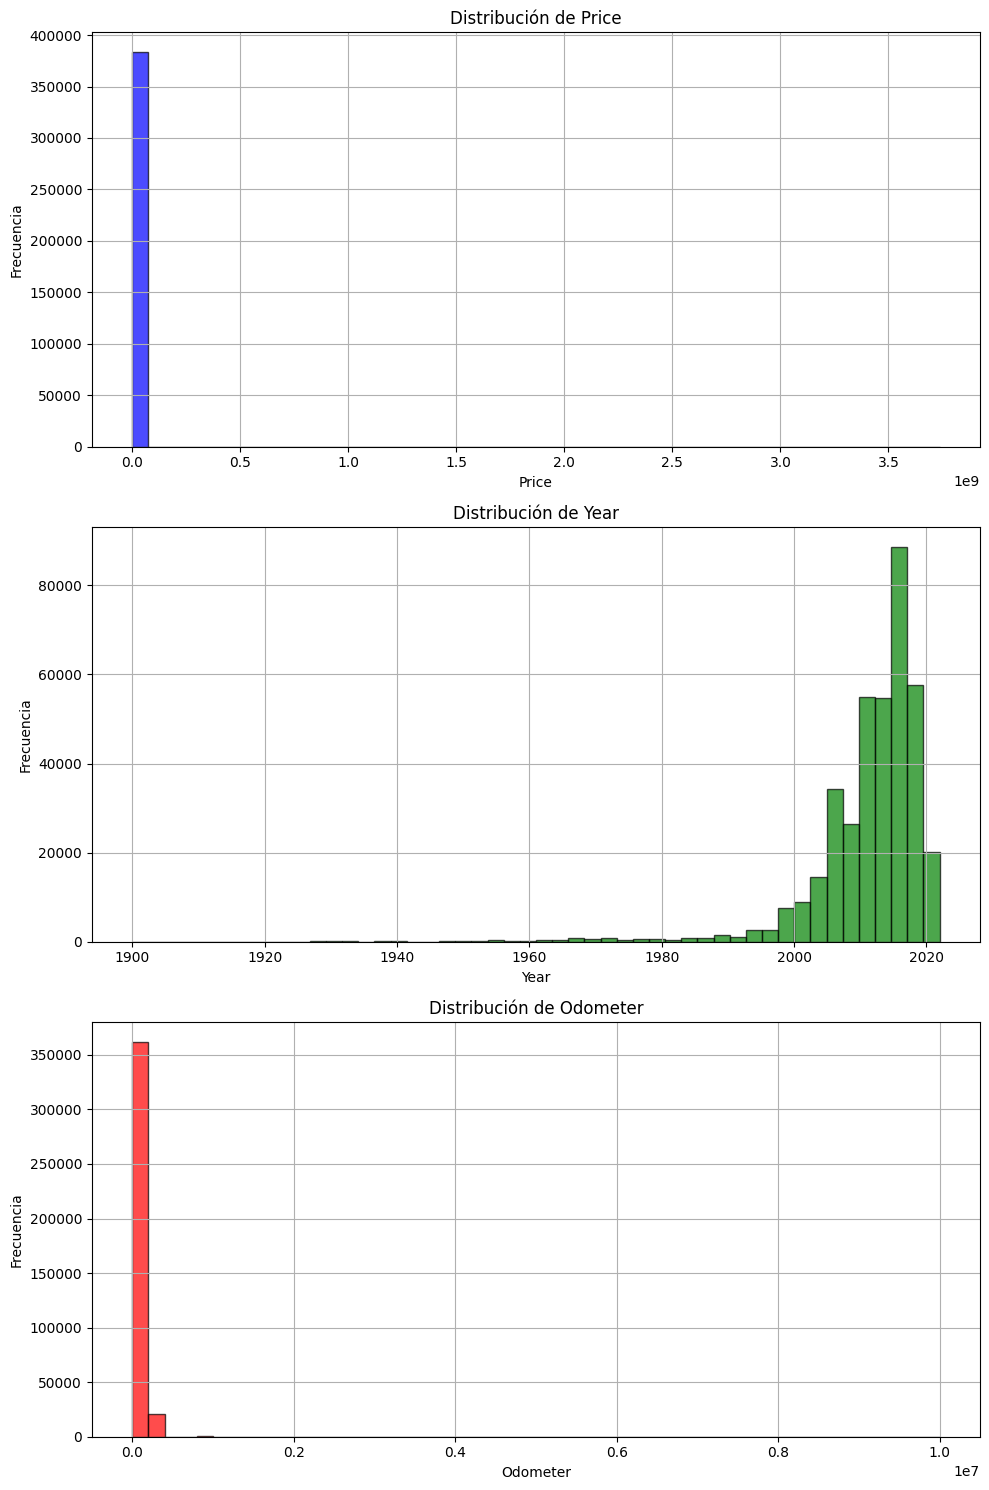

In [17]:
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(10, 15))

# Price
df_limpio_filas['price'].hist(ax=ax[0], bins=50, edgecolor='black', color='blue', alpha=0.7)
ax[0].set_title('Distribución de Price')
ax[0].set_xlabel('Price')
ax[0].set_ylabel('Frecuencia')

# Year
df_limpio_filas['year'].hist(ax=ax[1], bins=50, edgecolor='black', color='green', alpha=0.7)
ax[1].set_title('Distribución de Year')
ax[1].set_xlabel('Year')
ax[1].set_ylabel('Frecuencia')

# Odometer
df_limpio_filas['odometer'].hist(ax=ax[2], bins=50, edgecolor='black', color='red', alpha=0.7)
ax[2].set_title('Distribución de Odometer')
ax[2].set_xlabel('Odometer')
ax[2].set_ylabel('Frecuencia')

plt.tight_layout()
plt.show()

3b) Añade la columna `age`, calculada a partir de `year`, para determinar los años del vehículo y una vez obtenida, elimina la columna `year`. Genera el histograma de la nueva variable. 

In [18]:
import datetime
current_year = datetime.datetime.now().year
df_limpio_filas['age'] = current_year - df_limpio_filas['year']
df_limpio_filas.drop(columns=['year'], inplace=True)


/tmp/ipykernel_6887/1573942748.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_limpio_filas['age'] = current_year - df_limpio_filas['year']
/tmp/ipykernel_6887/1573942748.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_limpio_filas.drop(columns=['year'], inplace=True)


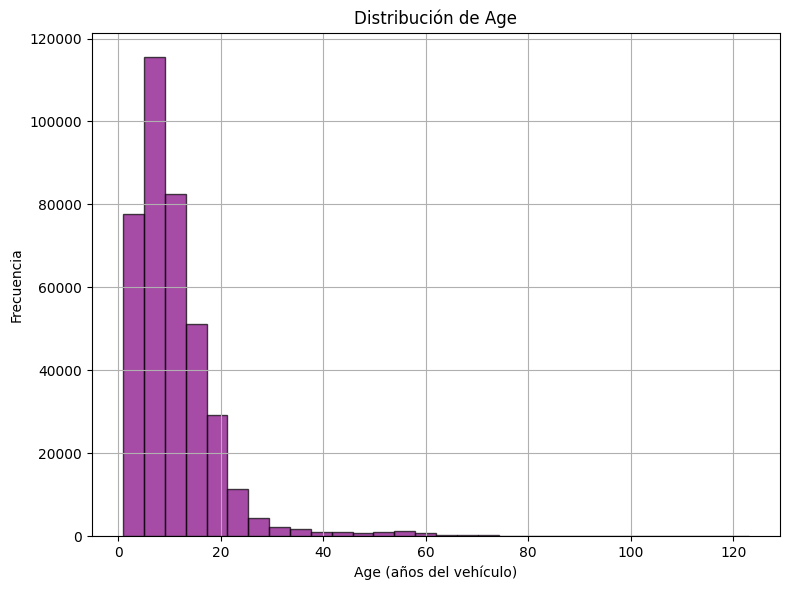

In [19]:
plt.figure(figsize=(8, 6))
df_limpio_filas['age'].hist(bins=30, edgecolor='black', color='purple', alpha=0.7)
plt.title('Distribución de Age')
plt.xlabel('Age (años del vehículo)')
plt.ylabel('Frecuencia')
plt.tight_layout()
plt.show()

4a) Para visualizar si hay valores atípicos, genera gráficos de box plot para las tres variables (`price, age, odometer`)

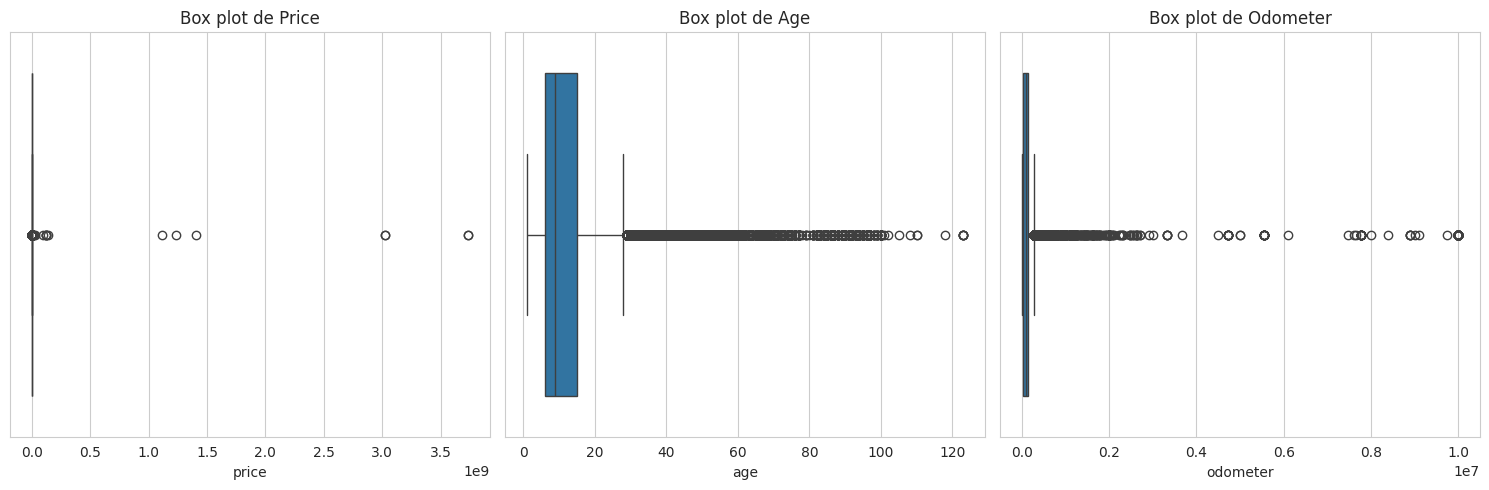

In [20]:
sns.set_style("whitegrid")
plt.figure(figsize=(15, 5))

# Price
plt.subplot(1, 3, 1)
sns.boxplot(x=df_limpio_filas['price'])
plt.title('Box plot de Price')

# Age
plt.subplot(1, 3, 2)
sns.boxplot(x=df_limpio_filas['age'])
plt.title('Box plot de Age')

# Odometer
plt.subplot(1, 3, 3)
sns.boxplot(x=df_limpio_filas['odometer'])
plt.title('Box plot de Odometer')

plt.tight_layout()
plt.show()

Si el conjunto de outliers es “relativamente grande” (aunque sabemos que deben andar alrededor de un 5% del conjunto total de datos), realizar una investigación particular sobre ellos que permita tomar mejores decisiones.

4b) Calcula, para cada variable, el porcentaje de sus valores atípicos y elimínalos del dataframe ¿Qué porcentaje de los registros iniciales se eliminaron?

In [21]:
initial_records = df_limpio_filas.shape[0]

variables = ['price', 'age', 'odometer']

outliers_indices = set()

for var in variables:
    Q1 = df_limpio_filas[var].quantile(0.25)
    Q3 = df_limpio_filas[var].quantile(0.75)
    IQR = Q3 - Q1

    outliers = df_limpio_filas[(df_limpio_filas[var] < (Q1 - 1.5*IQR)) | (df_limpio_filas[var] > (Q3 + 1.5*IQR))].index
    outliers_indices.update(outliers)
    print(f"Porcentaje de outliers en {var}: {len(outliers) * 100 / df_limpio_filas.shape[0]:.2f}%")

# Eliminar outliers
df_limpio_filas = df_limpio_filas.drop(outliers_indices)

# Porcentaje de registros eliminados
percentage_removed = (initial_records - df_limpio_filas.shape[0]) * 100 / initial_records
print(f"Porcentaje de registros eliminados: {percentage_removed:.2f}%")

Porcentaje de outliers en price: 1.64%
Porcentaje de outliers en age: 3.14%
Porcentaje de outliers en odometer: 0.81%
Porcentaje de registros eliminados: 5.40%


4c) Dibuja nuevamente los histogramas para observar claramente el sesgo de las variables tras la eliminación de los outliers. 

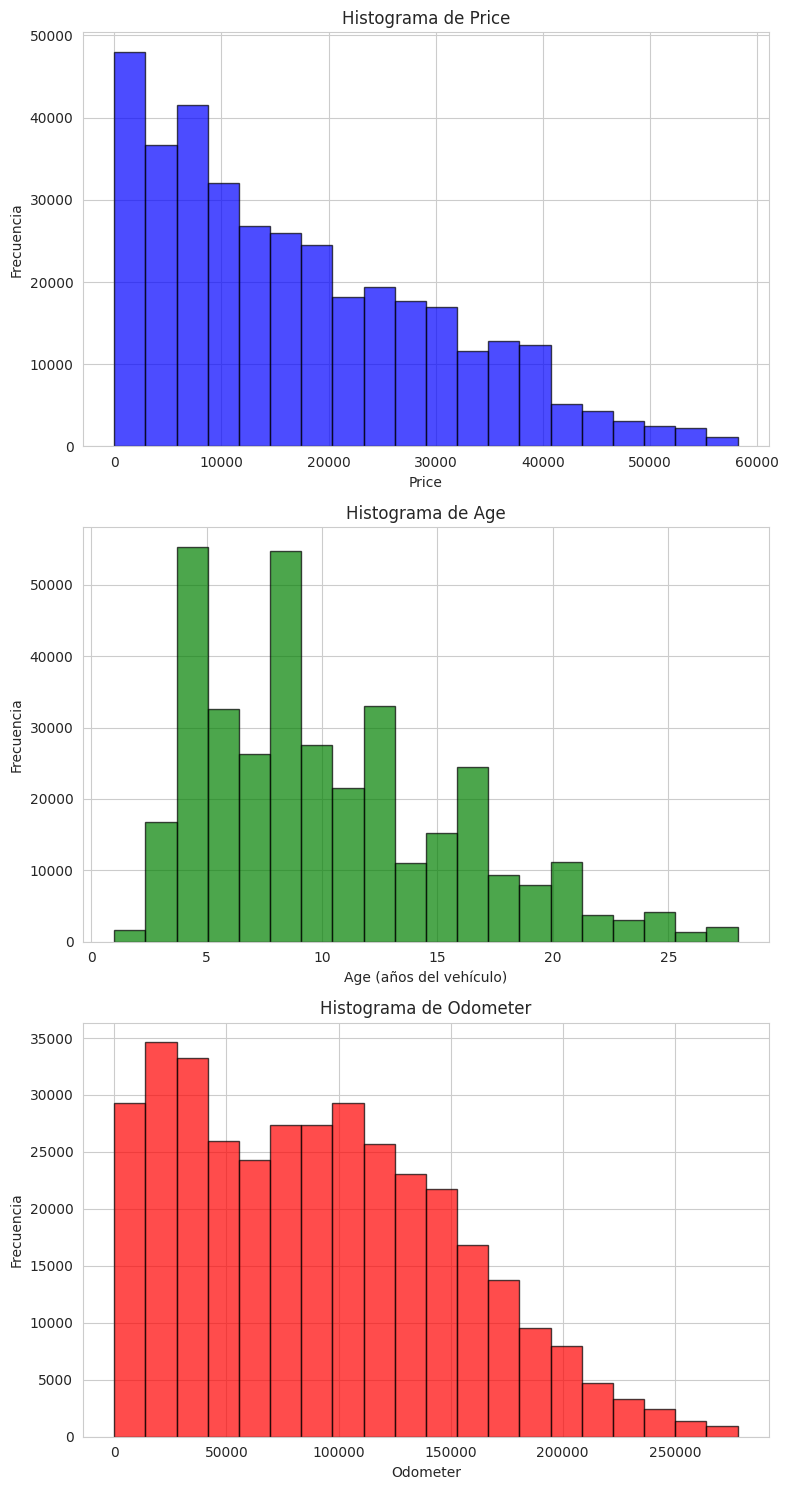

In [22]:
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(8, 15))

# Price
ax[0].hist(df_limpio_filas['price'], bins=20, edgecolor='black', color='blue', alpha=0.7)
ax[0].set_title('Histograma de Price')
ax[0].set_xlabel('Price')
ax[0].set_ylabel('Frecuencia')

# Age
ax[1].hist(df_limpio_filas['age'], bins=20, edgecolor='black', color='green', alpha=0.7)
ax[1].set_title('Histograma de Age')
ax[1].set_xlabel('Age (años del vehículo)')
ax[1].set_ylabel('Frecuencia')

# odometer
ax[2].hist(df_limpio_filas['odometer'], bins=20, edgecolor='black', color='red', alpha=0.7)
ax[2].set_title('Histograma de Odometer')
ax[2].set_xlabel('Odometer')
ax[2].set_ylabel('Frecuencia')

plt.tight_layout()
plt.show()

# **Parte 2**. Ingeniería de características

## Transformando variables numéricas 

La distribución de las variables determinará que método usar y en qué orden. Por ejemplo, en variables sesgadas se debe realizar primero la transformación  y luego el escalamiento, ya que el efecto deseado es "desinclinar" las distribuciones del eje y ese efecto se maximiza cuando aplica en el rango completo en comparación con aplicarlo en variables con una desviación estándar unitaria (por z-score) o variables en el rango [0,1] (por Min-Max).

Aplicar es escalamiento antes comprimiría la mayoría de los datos en un rango estrecho. Entonces se debe iniciar con transformar la característica en Gaussiana y luego escalarla.

5a) Genera gráficos Q-Q de las variables `price, age, odometer` para observar las diferencias entre sus distribuciones y la normal.


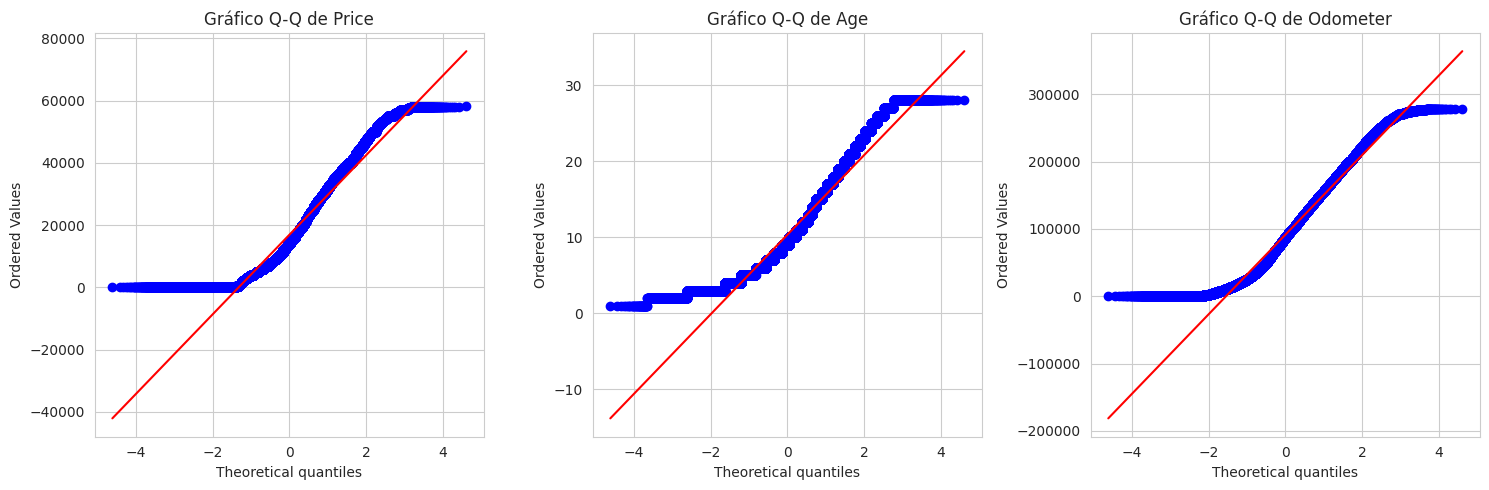

In [23]:
plt.figure(figsize=(15, 5))

# Price
plt.subplot(1, 3, 1)
stats.probplot(df_limpio_filas['price'], dist="norm", plot=plt)
plt.title('Gráfico Q-Q de Price')

# Age
plt.subplot(1, 3, 2)
stats.probplot(df_limpio_filas['age'], dist="norm", plot=plt)
plt.title('Gráfico Q-Q de Age')

# Odometer
plt.subplot(1, 3, 3)
stats.probplot(df_limpio_filas['odometer'], dist="norm", plot=plt)
plt.title('Gráfico Q-Q de Odometer')

plt.tight_layout()
plt.show()

Las transformaciones *Box-Cox* y *Yeo-Johnson* son generalizaciones, pues incluyen casos especiales de transformaciones: logarítmica (`λ = 0`), recíproca (`λ = -1`),  raíz cuadrada (`λ = 0.5`) y más exponentes. En *Box-Cox* se evalúan varios valores de `λ` y se selecciona aquel que arroja la mejor transformación

La transformación de *Yeo-Johnson* es una extensión de la transformación de *Box-Cox* que ya no está restringida a valores positivos. En otras palabras, la transformación de *Yeo-Johnson* se puede utilizar en variables con valores cero y negativos, así como valores positivos. Cuando la variable solo tiene valores positivos, la transformación de *Yeo-Johnson* es como la transformación de *Box-Cox* de la variable más uno.

En este caso, como las variables `price` y `odometer` tienen valores de 0, utilizaremos *Yeo-Johnson*.

5b) Aplica la transformación Yeo-Johnson para reducir el sesgo en estas variables. Házlo en una copia del dataframe a la que denominarás `transf_df`.

In [24]:
transf_df = df_limpio_filas.copy()

transf_df['price'], _ = stats.yeojohnson(transf_df['price'])
transf_df['odometer'], _ = stats.yeojohnson(transf_df['odometer'])

5c) Dibuja nuevamente los gráficos Q-Q y los histogramas para observar el efecto de la transformación.

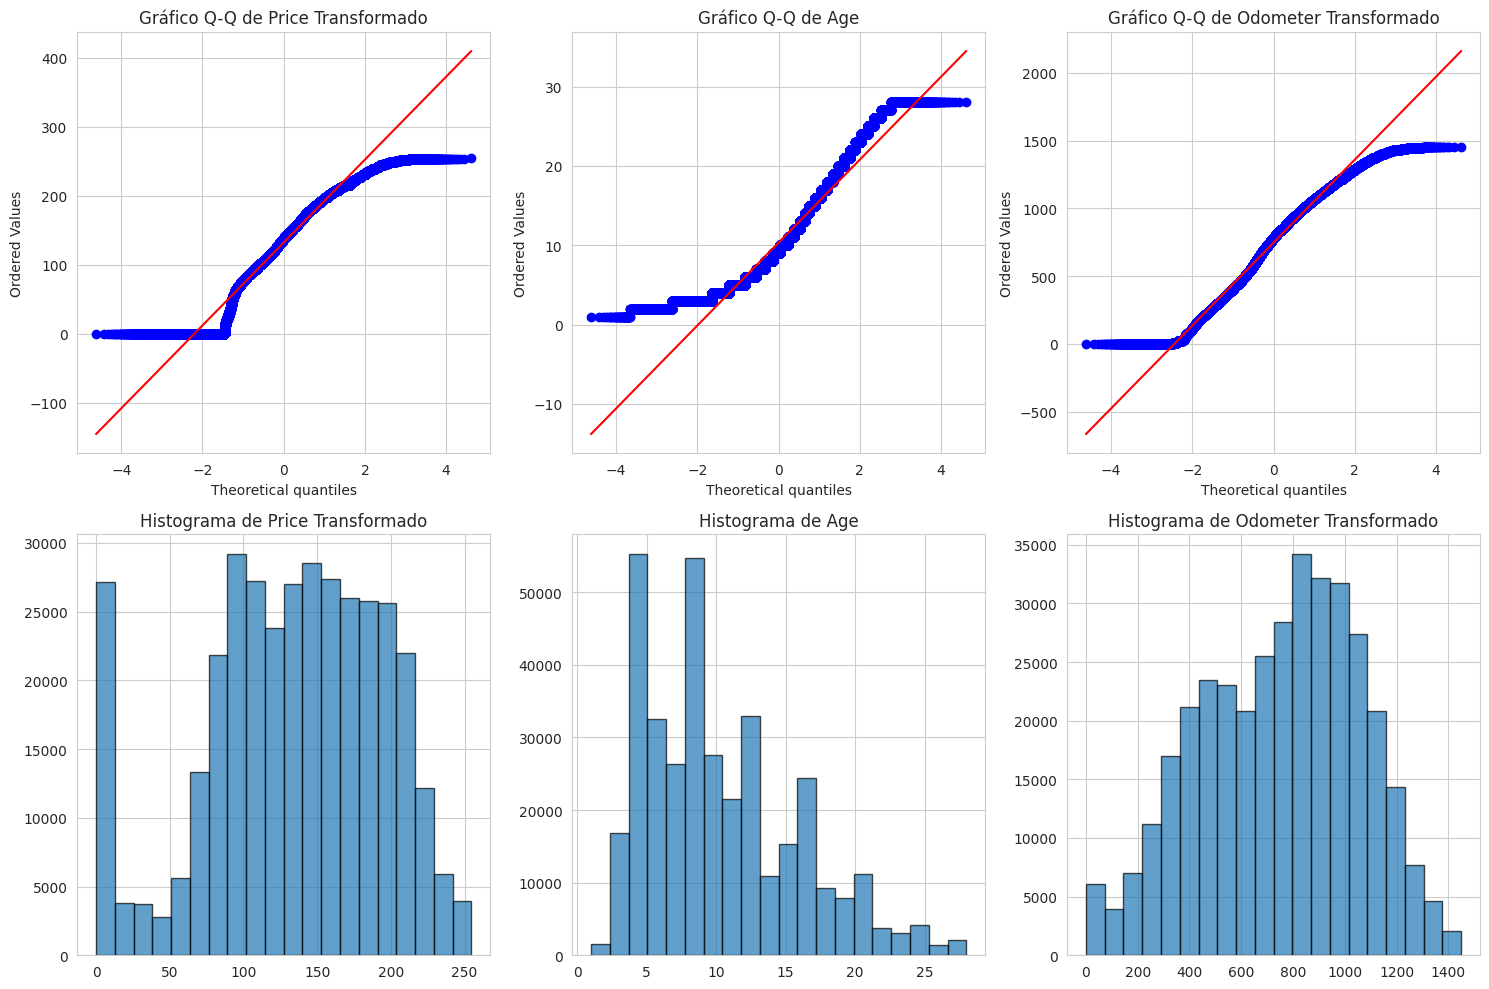

In [25]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

# Gráficos Q-Q
stats.probplot(transf_df['price'], dist="norm", plot=axes[0, 0])
axes[0, 0].set_title('Gráfico Q-Q de Price Transformado')

stats.probplot(transf_df['age'], dist="norm", plot=axes[0, 1])
axes[0, 1].set_title('Gráfico Q-Q de Age')

stats.probplot(transf_df['odometer'], dist="norm", plot=axes[0, 2])
axes[0, 2].set_title('Gráfico Q-Q de Odometer Transformado')

# Histogramas
axes[1, 0].hist(transf_df['price'], bins=20, edgecolor='black', alpha=0.7)
axes[1, 0].set_title('Histograma de Price Transformado')

axes[1, 1].hist(transf_df['age'], bins=20, edgecolor='black', alpha=0.7)
axes[1, 1].set_title('Histograma de Age')

axes[1, 2].hist(transf_df['odometer'], bins=20, edgecolor='black', alpha=0.7)
axes[1, 2].set_title('Histograma de Odometer Transformado')

plt.tight_layout()
plt.show()


## Escalando variables numéricas

6a) Como las tres variables poseen diferentes escalas, aplica el método Min-Max (al dataframe obtenido: `transf_df`) para que queden en el rango fijo [0 a 1]. Házlo en una copia del dataframe a la que denominarás `minmax_df`.


In [26]:
from sklearn.preprocessing import MinMaxScaler

minmax_df = transf_df.copy()

scaler = MinMaxScaler()

cols_to_scale = ['price', 'age', 'odometer']
minmax_df[cols_to_scale] = scaler.fit_transform(minmax_df[cols_to_scale])

minmax_df.head()

,region,region_url,price,manufacturer,model,fuel,odometer,title_status,transmission,type,state,lat,long,age
27,auburn,https://auburn.craigslist.org,0.788278,gmc,sierra 1500 crew cab slt,gas,0.434618,clean,other,pickup,al,32.590,-85.4800,0.296296
28,auburn,https://auburn.craigslist.org,0.663623,chevrolet,silverado 1500,gas,0.485128,clean,other,pickup,al,32.590,-85.4800,0.444444
29,auburn,https://auburn.craigslist.org,0.846457,chevrolet,silverado 1500 crew,gas,0.241182,clean,other,pickup,al,32.590,-85.4800,0.074074
30,auburn,https://auburn.craigslist.org,0.761221,toyota,tundra double cab sr,gas,0.362228,clean,other,pickup,al,32.590,-85.4800,0.185185
31,auburn,https://auburn.craigslist.org,0.555366,ford,f-150 xlt,gas,0.662411,clean,automatic,truck,al,32.592,-85.5189,0.333333


6b) Dibuja nuevamente los histogramas para verificar que el escalamiento no cambia la distribución.

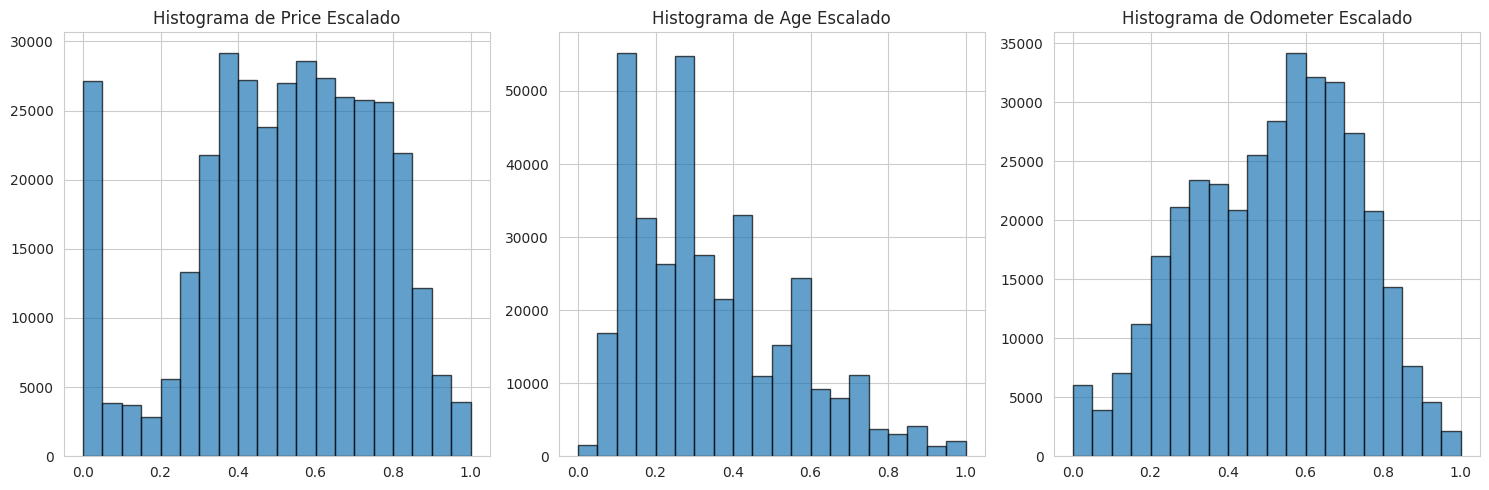

In [27]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

# Price
axes[0].hist(minmax_df['price'], bins=20, edgecolor='black', alpha=0.7)
axes[0].set_title('Histograma de Price Escalado')

# Age
axes[1].hist(minmax_df['age'], bins=20, edgecolor='black', alpha=0.7)
axes[1].set_title('Histograma de Age Escalado')

# odo
axes[2].hist(minmax_df['odometer'], bins=20, edgecolor='black', alpha=0.7)
axes[2].set_title('Histograma de Odometer Escalado')

plt.tight_layout()
plt.show()

## Codificando variables categóricas


7a) Utiliza el método `describe()` para obtener el resumen de las estadísticas descriptivas en las variables categóricas. 

In [28]:
categorical_stats = df_limpio_filas.describe(include=['object'])
categorical_stats

,region,region_url,manufacturer,model,fuel,title_status,transmission,type,state
count,362763,362763,362763,362763,362763,362763,362763,362763,362763
unique,404,413,40,19263,5,6,3,13,51
top,columbus,https://grandrapids.craigslist.org,ford,f-150,gas,clean,automatic,sedan,ca
freq,3015,2743,61186,7197,309289,351101,288241,153765,42325


7b) Según la cardinalidad observada, separa en dos listas (`highly_cardinal_variables` y `few_cardinal_variables`) los nombres de las variables con alta cardinalidad y baja cardinalidad respectivamente.

Treshold es 100

In [29]:
unique_counts = categorical_stats.loc['unique']

treshold = 100
highly_cardinal_variables = unique_counts[unique_counts > treshold].index.tolist()
few_cardinal_variables = unique_counts[unique_counts <= treshold].index.tolist()

In [30]:
highly_cardinal_variables

['region', 'region_url', 'model']

In [31]:
few_cardinal_variables

['manufacturer', 'fuel', 'title_status', 'transmission', 'type', 'state']

7c) Visualiza en gráficos de barras la frecuencias de las categorías para las variables con baja cardinalidad (en `few_cardinal_variables`)

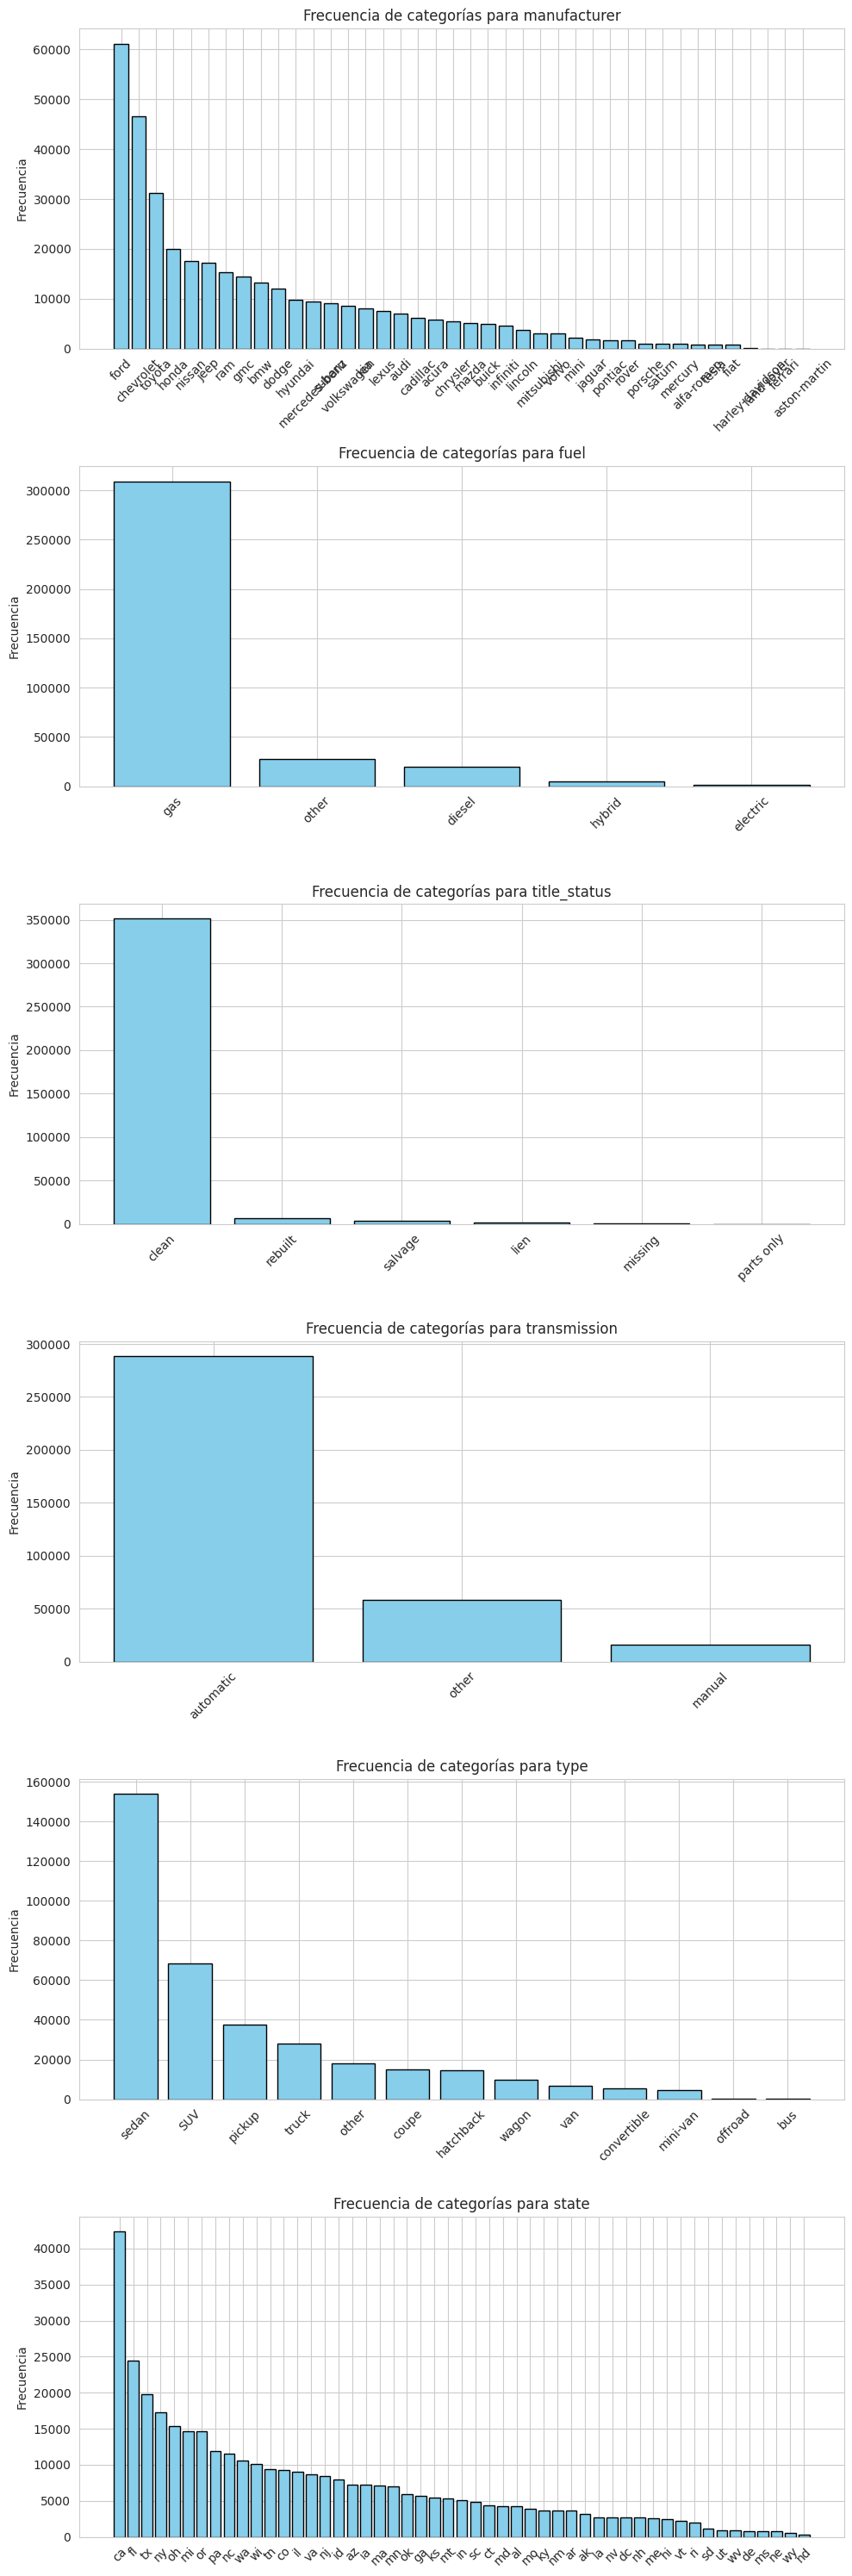

In [32]:
num_vars = len(few_cardinal_variables)

fig, axes = plt.subplots(nrows=num_vars, figsize=(10, 5 * num_vars))

for i, var in enumerate(few_cardinal_variables):
    category_frequencies = df_limpio_filas[var].value_counts()
    
    axes[i].bar(category_frequencies.index, category_frequencies.values, color='skyblue', edgecolor='black')
    axes[i].set_title(f'Frecuencia de categorías para {var}')
    axes[i].set_ylabel('Frecuencia')
    for tick in axes[i].get_xticklabels():
        tick.set_rotation(45)

plt.tight_layout()
plt.show()


8. Aplica codificación *one-hot* a las variables en `few_cardinal_variables`.


In [33]:
one_hot_encoded = pd.get_dummies(df_limpio_filas[few_cardinal_variables], drop_first=True)

df_limpio_filas = pd.concat([df_limpio_filas, one_hot_encoded], axis=1)
df_limpio_filas.drop(columns=few_cardinal_variables, inplace=True)


In [34]:
df_limpio_filas.tail()

,region,region_url,price,model,odometer,lat,long,age,manufacturer_alfa-romeo,manufacturer_aston-martin,...,state_sd,state_tn,state_tx,state_ut,state_va,state_vt,state_wa,state_wi,state_wv,state_wy
426875,wyoming,https://wyoming.craigslist.org,23590,maxima s sedan 4d,32226.0,33.786500,-84.445400,4.0,False,False,...,False,False,False,False,False,False,False,False,False,True
426876,wyoming,https://wyoming.craigslist.org,30590,s60 t5 momentum sedan 4d,12029.0,33.786500,-84.445400,3.0,False,False,...,False,False,False,False,False,False,False,False,False,True
426877,wyoming,https://wyoming.craigslist.org,34990,xt4 sport suv 4d,4174.0,33.779214,-84.411811,3.0,False,False,...,False,False,False,False,False,False,False,False,False,True
426878,wyoming,https://wyoming.craigslist.org,28990,es 350 sedan 4d,30112.0,33.786500,-84.445400,5.0,False,False,...,False,False,False,False,False,False,False,False,False,True
426879,wyoming,https://wyoming.craigslist.org,30590,4 series 430i gran coupe,22716.0,33.779214,-84.411811,4.0,False,False,...,False,False,False,False,False,False,False,False,False,True


9. Aplica codificación binaria a las variables en `highly_cardinal_variables`.

In [35]:
import category_encoders as ce

encoder = ce.BinaryEncoder(cols=highly_cardinal_variables)

binary_encoded = encoder.fit_transform(df_limpio_filas[highly_cardinal_variables])

df_limpio_filas = pd.concat([df_limpio_filas, binary_encoded], axis=1)
df_limpio_filas.drop(columns=highly_cardinal_variables, inplace=True)


/home/armando/.virtualenvs/personal-TRUYlswm/lib/python3.11/site-packages/category_encoders/utils.py:28: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif pd.api.types.is_categorical_dtype(cols):
/home/armando/.virtualenvs/personal-TRUYlswm/lib/python3.11/site-packages/category_encoders/utils.py:50: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return pd.api.types.is_categorical_dtype(dtype)
/home/armando/.virtualenvs/personal-TRUYlswm/lib/python3.11/site-packages/category_encoders/utils.py:50: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return pd.api.types.is_categorical_dtype(dtype)
/home/armando/.virtualenvs/personal-TRUYlswm/lib/python3.11/site-packages/category_encoders/utils.py:50: FutureWarning: 

In [36]:
df_limpio_filas.head()

,price,odometer,lat,long,age,manufacturer_alfa-romeo,manufacturer_aston-martin,manufacturer_audi,manufacturer_bmw,manufacturer_buick,...,model_5,model_6,model_7,model_8,model_9,model_10,model_11,model_12,model_13,model_14
27,33590,57923.0,32.590,-85.4800,9.0,False,False,False,False,False,...,0,0,0,0,0,0,0,0,0,1
28,22590,71229.0,32.590,-85.4800,13.0,False,False,False,False,False,...,0,0,0,0,0,0,0,0,1,0
29,39590,19160.0,32.590,-85.4800,3.0,False,False,False,False,False,...,0,0,0,0,0,0,0,0,1,1
30,30990,41124.0,32.590,-85.4800,6.0,False,False,False,False,False,...,0,0,0,0,0,0,0,1,0,0
31,15000,128000.0,32.592,-85.5189,10.0,False,False,False,False,False,...,0,0,0,0,0,0,0,1,0,1


10. Concatena los dataframes obtenidos de las codificaciones anteriores al dataframe `minmax_df` (cuyas variables numéricas ya están transformadas) y elimina las columnas categóricas originales. Toma en cuenta que si los índices de los dataframes no coinciden, la concatenación no se realizará correctamente. Utiliza `reset_index(drop=True, inplace=True)` para restablecer los índices.

In [37]:
# Restableciendo los índices de los dataframes
minmax_df.reset_index(drop=True, inplace=True)
one_hot_encoded.reset_index(drop=True, inplace=True)
binary_encoded.reset_index(drop=True, inplace=True)

# Concatenando los dataframes
final_df = pd.concat([minmax_df, one_hot_encoded, binary_encoded], axis=1)

# Eliminando las columnas categóricas originales
final_df.drop(columns=few_cardinal_variables, inplace=True)
final_df.drop(columns=highly_cardinal_variables, inplace=True)


In [38]:
final_df

,price,odometer,lat,long,age,manufacturer_alfa-romeo,manufacturer_aston-martin,manufacturer_audi,manufacturer_bmw,manufacturer_buick,...,model_5,model_6,model_7,model_8,model_9,model_10,model_11,model_12,model_13,model_14
0,0.788278,0.434618,32.590000,-85.480000,0.296296,False,False,False,False,False,...,0,0,0,0,0,0,0,0,0,1
1,0.663623,0.485128,32.590000,-85.480000,0.444444,False,False,False,False,False,...,0,0,0,0,0,0,0,0,1,0
2,0.846457,0.241182,32.590000,-85.480000,0.074074,False,False,False,False,False,...,0,0,0,0,0,0,0,0,1,1
3,0.761221,0.362228,32.590000,-85.480000,0.185185,False,False,False,False,False,...,0,0,0,0,0,0,0,1,0,0
4,0.555366,0.662411,32.592000,-85.518900,0.333333,False,False,False,False,False,...,0,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362758,0.676226,0.318147,33.786500,-84.445400,0.111111,False,False,False,False,False,...,1,1,0,0,1,0,0,1,1,1
362759,0.756945,0.188153,33.786500,-84.445400,0.074074,False,False,False,False,False,...,0,0,0,0,1,1,0,1,1,1
362760,0.802353,0.106799,33.779214,-84.411811,0.074074,False,False,False,False,False,...,0,0,0,0,0,1,1,0,1,1
362761,0.739512,0.306860,33.786500,-84.445400,0.148148,False,False,False,False,False,...,1,1,1,0,1,1,1,1,0,0
